# Data Exploration

In [1]:
# Loading the Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset:

data = pd.read_csv('/content/Litecoin_dataset_April_2013_till_May_2025.csv')

In [3]:
df = data.copy()

In [4]:
df.head(10)

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap
0,28-May-25,12:00:00 AM,12:41:00 PM,95.96,97.43,93.59,95.30,"409,308,570","7,234,342,339"
1,27-May-25,12:00:00 AM,8:37:00 PM,95.01,96.98,93.25,95.96,"461,941,241","7,283,744,240"
2,26-May-25,12:00:00 AM,12:58:00 PM,95.66,97.57,94.51,95.01,"359,429,190","7,210,970,875"
3,25-May-25,12:00:00 AM,12:36:00 AM,95.69,96.04,93.32,95.66,"373,036,618","7,259,848,450"
4,24-May-25,12:00:00 AM,10:58:00 AM,95.14,97.77,95.03,95.69,"362,386,410","7,261,627,049"
5,23-May-25,12:00:00 AM,3:10:00 AM,100.28,102.83,94.85,95.14,"683,087,073","7,219,851,223"
6,22-May-25,12:00:00 AM,10:45:00 PM,97.26,100.88,97.14,100.28,"689,339,568","7,609,720,057"
7,21-May-25,12:00:00 AM,4:52:00 PM,94.40,98.28,93.71,97.26,"652,438,243","7,380,094,799"
8,20-May-25,12:00:00 AM,2:22:00 AM,98.34,99.54,92.53,94.40,"704,464,955","7,162,607,688"
9,19-May-25,12:00:00 AM,12:00:00 AM,101.14,101.14,94.54,98.34,"559,403,328","7,461,590,470"


In [5]:
# checking the information of the data:

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4413 non-null   object 
 1   timeOpen     4413 non-null   object 
 2   timeHigh     4413 non-null   object 
 3    open        4413 non-null   float64
 4    high        4413 non-null   float64
 5    low         4413 non-null   float64
 6    close       4413 non-null   float64
 7    volume      4413 non-null   object 
 8    marketCap   4413 non-null   object 
dtypes: float64(4), object(5)
memory usage: 310.4+ KB


(4413, 9)

In [6]:
# Initial Exploratory Data Analysis (EDA):

df.describe()

,open,high,low,close
count,4413.000000,4413.000000,4413.000000,4413.000000
mean,63.651378,65.959030,61.156984,63.658872
std,60.083051,62.937941,56.939888,60.049502
min,1.150000,1.340000,1.110000,1.160000
25%,4.740000,4.920000,4.600000,4.750000
50%,57.210000,58.790000,55.600000,57.240000
75%,89.100000,91.680000,86.310000,89.180000
max,387.870000,412.960000,345.300000,386.450000


In [7]:
# cleaning the columns names:

df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'timeOpen', 'timeHigh', 'open', 'high', 'low', 'close',
       'volume', 'marketCap'],
      dtype='object')

In [8]:
# cleaning the Volume & Market Cap columns:

df['volume'] = df['volume'].astype(str).str.strip()
df['volume'] = df['volume'].replace('-', np.nan)
df['volume'] = df['volume'].str.replace(',', '', regex=False)
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
df['volume'] = df['volume'].fillna(0).astype(float)
pd.set_option('display.float_format', '{:.1f}'.format)

In [9]:
df['marketCap'] = df['marketCap'].astype(str).str.strip()
df['marketCap'] = df['marketCap'].str.replace(',', '', regex = False)
df['marketCap'] = pd.to_numeric(df['marketCap'], errors='coerce')
df['marketCap'] = df['marketCap'].astype(float)
pd.set_option('display.float_format', '{:.1f}'.format)

In [10]:
df

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap
0,28-May-25,12:00:00 AM,12:41:00 PM,96.0,97.4,93.6,95.3,409308570.0,7234342339.0
1,27-May-25,12:00:00 AM,8:37:00 PM,95.0,97.0,93.2,96.0,461941241.0,7283744240.0
2,26-May-25,12:00:00 AM,12:58:00 PM,95.7,97.6,94.5,95.0,359429190.0,7210970875.0
3,25-May-25,12:00:00 AM,12:36:00 AM,95.7,96.0,93.3,95.7,373036618.0,7259848450.0
4,24-May-25,12:00:00 AM,10:58:00 AM,95.1,97.8,95.0,95.7,362386410.0,7261627049.0
...,...,...,...,...,...,...,...,...,...
4408,3-May-13,12:00:00 AM,12:05:01 AM,3.4,3.5,2.4,3.0,0.0,52694847.0
4409,2-May-13,12:00:00 AM,8:15:02 AM,3.8,4.0,3.0,3.4,0.0,58287979.0
4410,1-May-13,12:00:00 AM,12:45:03 AM,4.3,4.4,3.5,3.8,0.0,65604596.0
4411,30-Apr-13,12:00:00 AM,9:00:01 AM,4.4,4.6,4.2,4.3,0.0,74020918.0


In [11]:
# converting date and time into date time frame now:

df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')

df['timeOpen'] = pd.to_datetime(df['timeOpen'], format = '%I:%M:%S %p').dt.time

df['timeHigh'] = pd.to_datetime(df['timeHigh'], format = '%I:%M:%S %p').dt.time

In [12]:
df['date_time_open'] = pd.to_datetime(df['Date'].astype(str) + ' ' + data['timeOpen'], format='%Y-%m-%d %I:%M:%S %p')
df['date_time_high'] = pd.to_datetime(df['Date'].astype(str) + ' ' + data['timeHigh'], format='%Y-%m-%d %I:%M:%S %p')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4413 non-null   datetime64[ns]
 1   timeOpen        4413 non-null   object        
 2   timeHigh        4413 non-null   object        
 3   open            4413 non-null   float64       
 4   high            4413 non-null   float64       
 5   low             4413 non-null   float64       
 6   close           4413 non-null   float64       
 7   volume          4413 non-null   float64       
 8   marketCap       4413 non-null   float64       
 9   date_time_open  4413 non-null   datetime64[ns]
 10  date_time_high  4413 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(6), object(2)
memory usage: 379.4+ KB


In [14]:
df.describe()

,Date,open,high,low,close,volume,marketCap,date_time_open,date_time_high
count,4413,4413.0,4413.0,4413.0,4413.0,4413.0,4413.0,4413,4413
mean,2019-05-13 23:59:59.999999744,63.7,66.0,61.2,63.7,1131858487.6,4165831102.1,2019-05-13 23:59:59.999999744,2019-05-14 10:40:08.905959936
min,2013-04-29 00:00:00,1.1,1.3,1.1,1.2,0.0,37892423.0,2013-04-29 00:00:00,2013-04-29 13:15:01
25%,2016-05-06 00:00:00,4.7,4.9,4.6,4.8,4297870.0,202769043.0,2016-05-06 00:00:00,2016-05-06 23:59:02
50%,2019-05-14 00:00:00,57.2,58.8,55.6,57.2,373329984.0,3684221719.0,2019-05-14 00:00:00,2019-05-14 08:02:00
75%,2022-05-21 00:00:00,89.1,91.7,86.3,89.2,1322213373.0,6336752067.0,2022-05-21 00:00:00,2022-05-21 16:29:00
max,2025-05-28 00:00:00,387.9,413.0,345.3,386.4,17994263494.0,25796522602.0,2025-05-28 00:00:00,2025-05-28 12:41:00
std,NaN,60.1,62.9,56.9,60.0,1916825709.9,3985613598.3,NaN,NaN


In [15]:
df.isnull().sum()

,0
Date,0
timeOpen,0
timeHigh,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
date_time_open,0


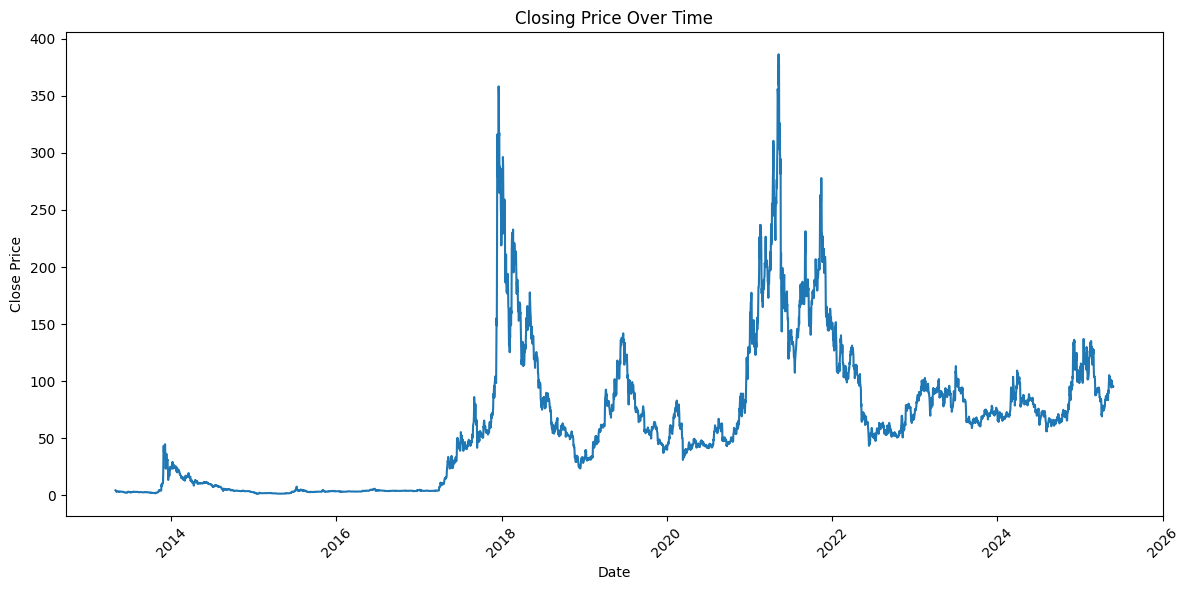

In [16]:
# Initial visualizations for EDA:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='close', data=df)
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

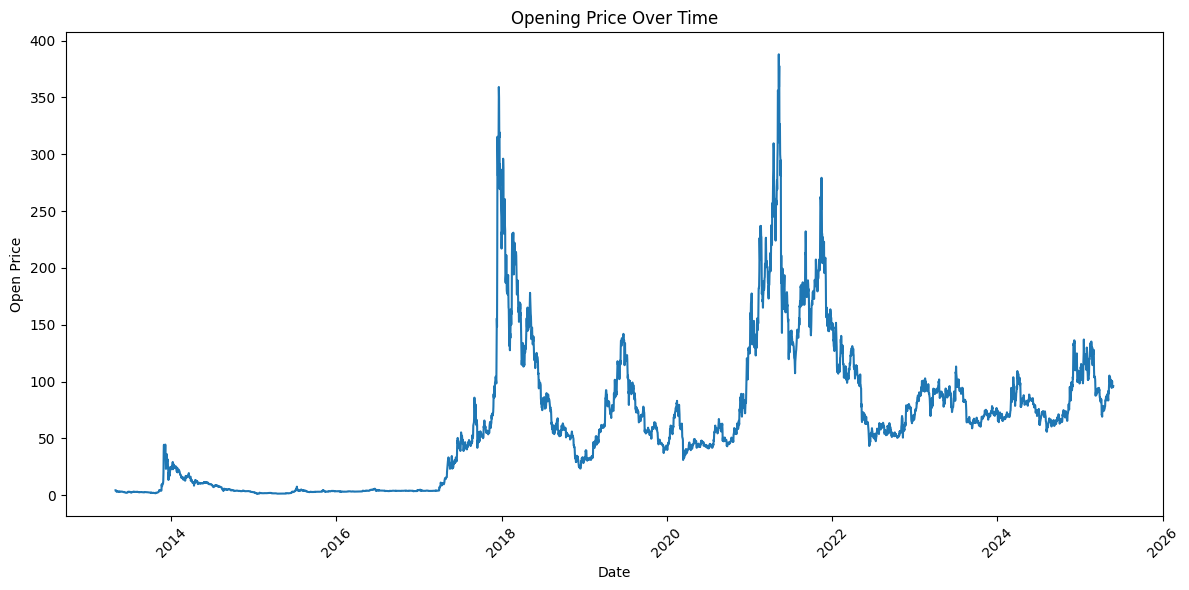

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='open', data=df)
plt.title('Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

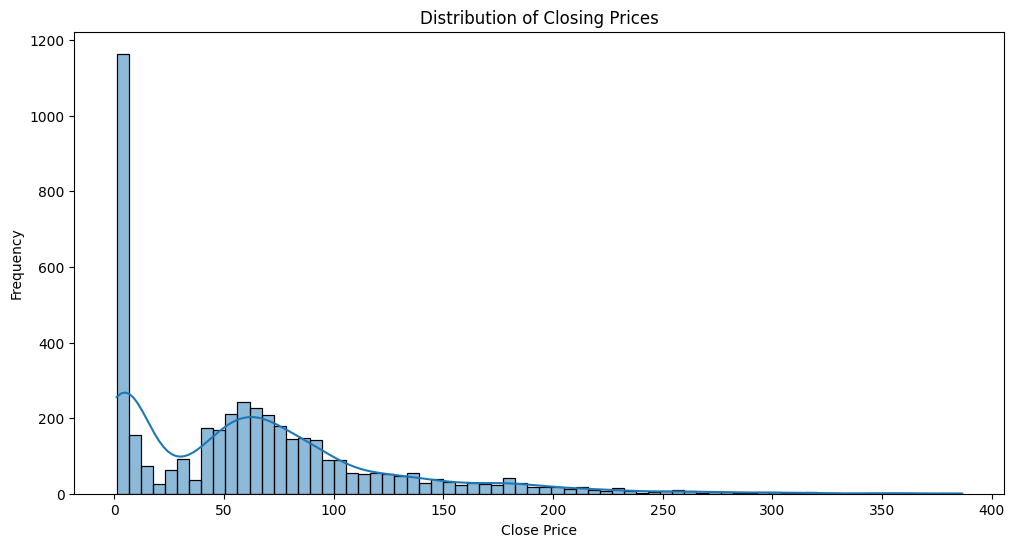

In [18]:
plt.figure(figsize = (12, 6))
sns.histplot(df['close'], kde=True, bins=70)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

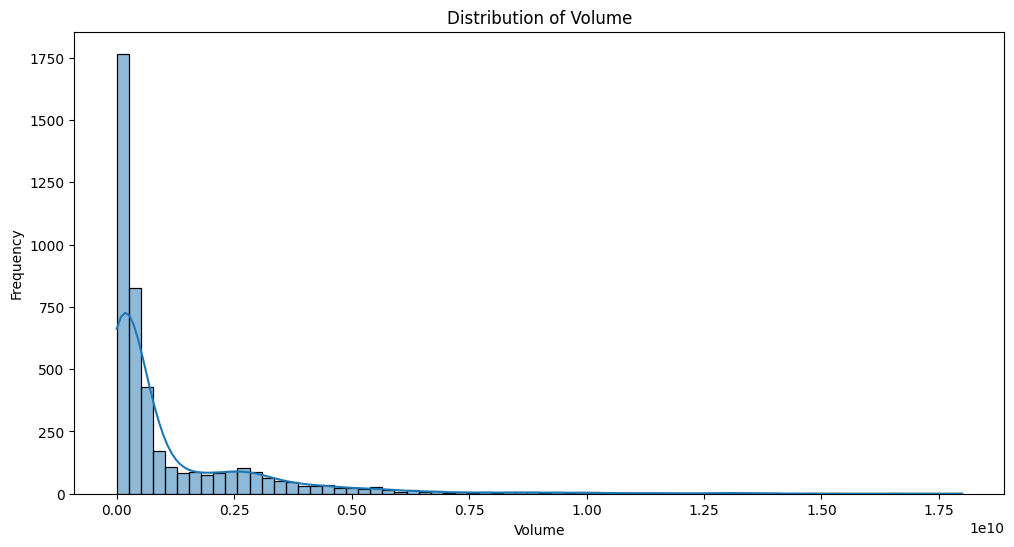

In [19]:
plt.figure(figsize = (12, 6))
sns.histplot(df['volume'], kde=True, bins=70)
plt.title("Distribution of Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

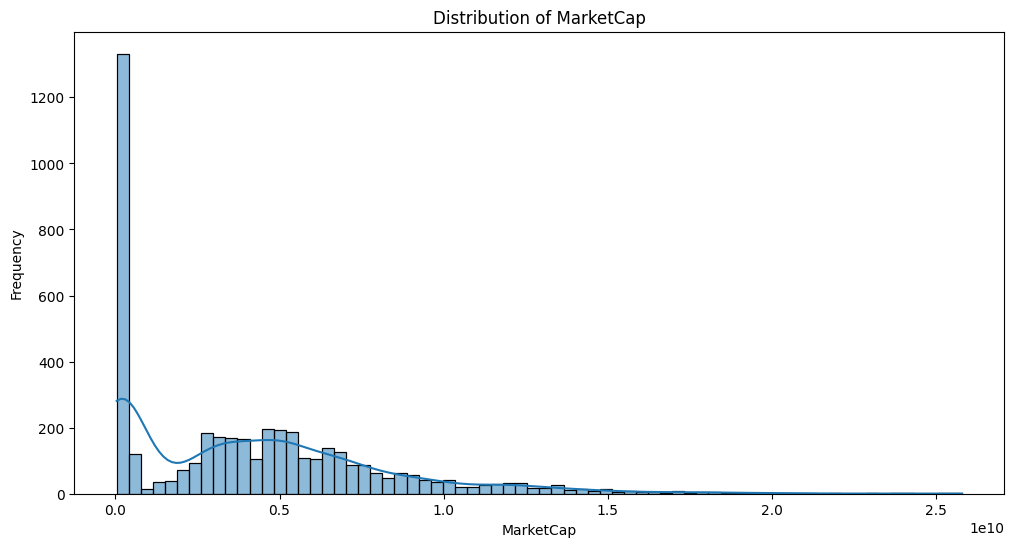

In [20]:
plt.figure(figsize = (12, 6))
sns.histplot(df['marketCap'], kde=True, bins=70)
plt.title("Distribution of MarketCap")
plt.xlabel("MarketCap")
plt.ylabel("Frequency")
plt.show()

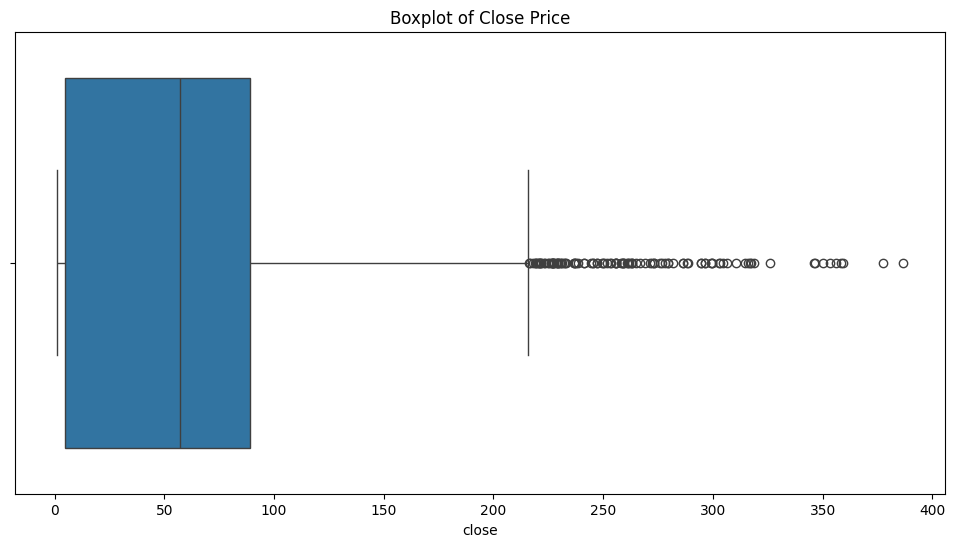

In [21]:
# Outliers for target variable:

plt.figure(figsize = (12, 6))
sns.boxplot(x=df['close'])
plt.title("Boxplot of Close Price")
plt.show()

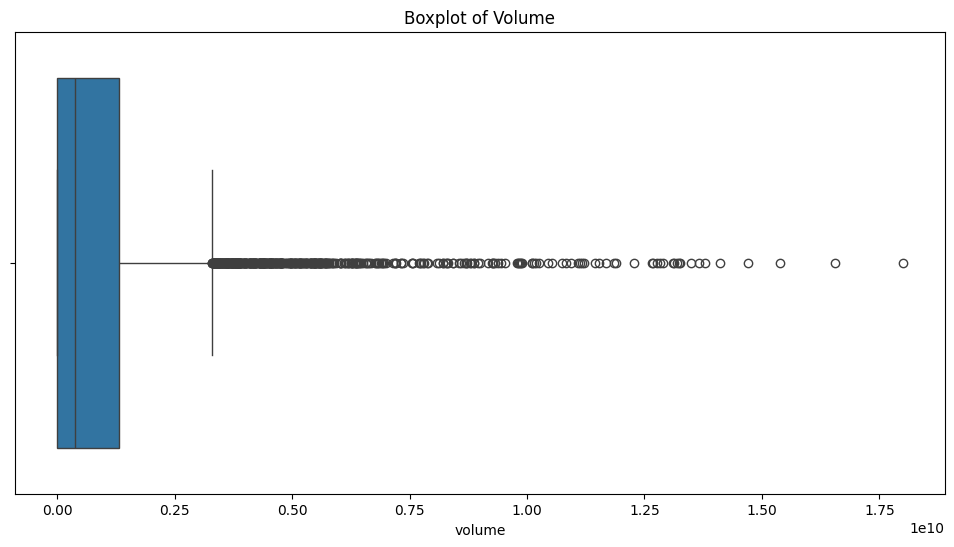

In [22]:
plt.figure(figsize = (12, 6))
sns.boxplot(x=df['volume'])
plt.title("Boxplot of Volume")
plt.show()

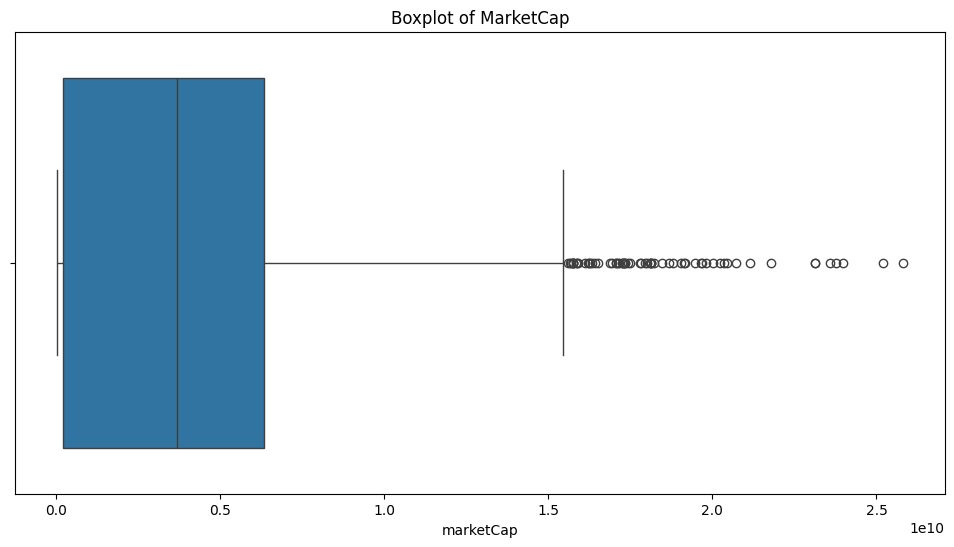

In [23]:
plt.figure(figsize = (12, 6))
sns.boxplot(x=df['marketCap'])
plt.title("Boxplot of MarketCap")
plt.show()

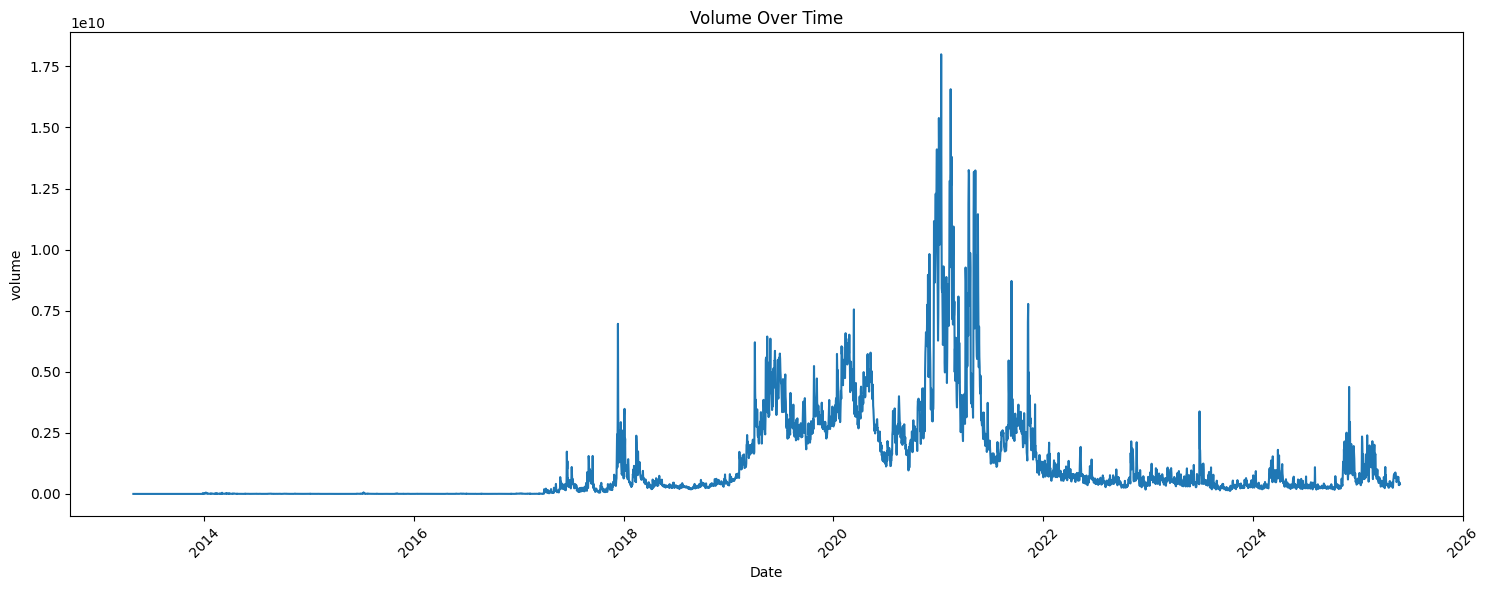

In [24]:
# checking if changes in volume are linked to price:

plt.figure(figsize = (15,6))
sns.lineplot(x='Date', y='volume', data=df)
plt.title("Volume Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

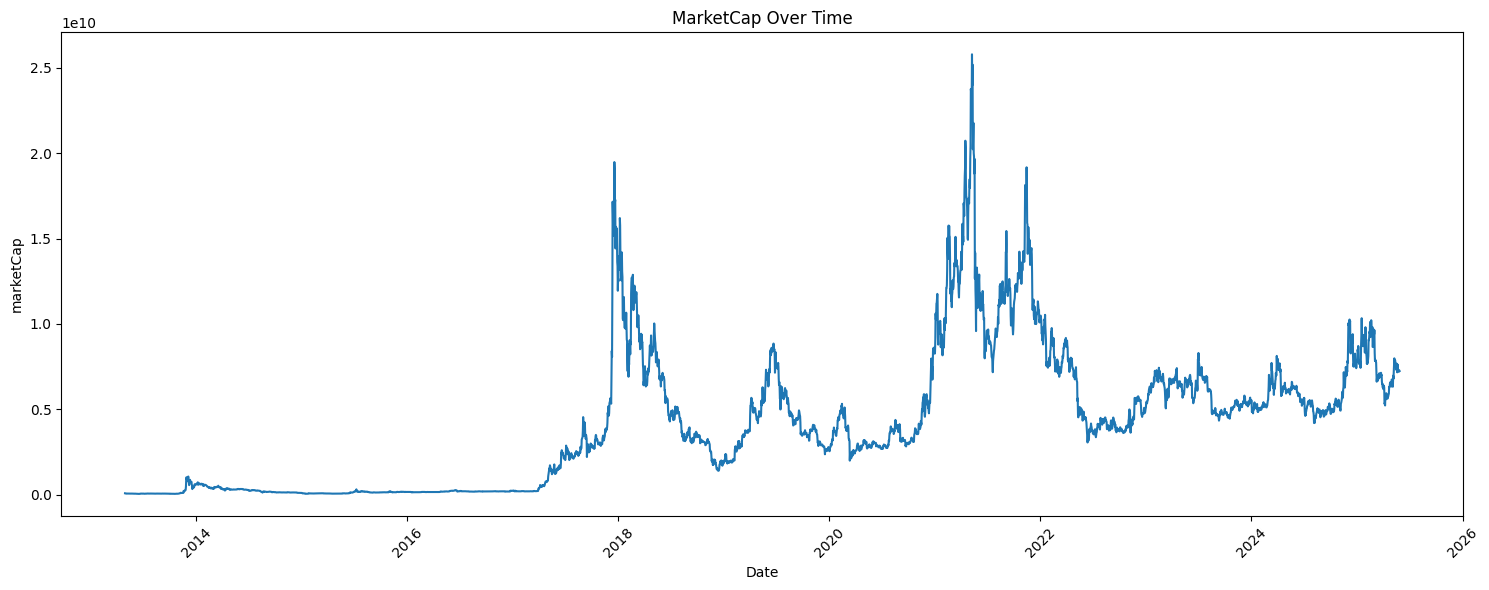

In [25]:
# checking if changes in marketcap are linked to price:

plt.figure(figsize = (15,6))
sns.lineplot(x='Date', y='marketCap', data=df)
plt.title("MarketCap Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

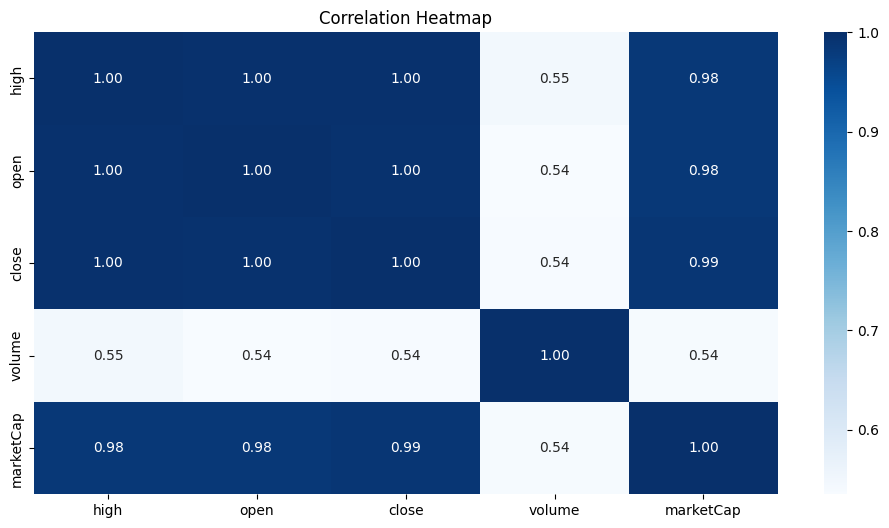

In [26]:
plt.figure(figsize = (12,6))
sns.heatmap(df[['high', 'open', 'close', 'volume', 'marketCap']].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

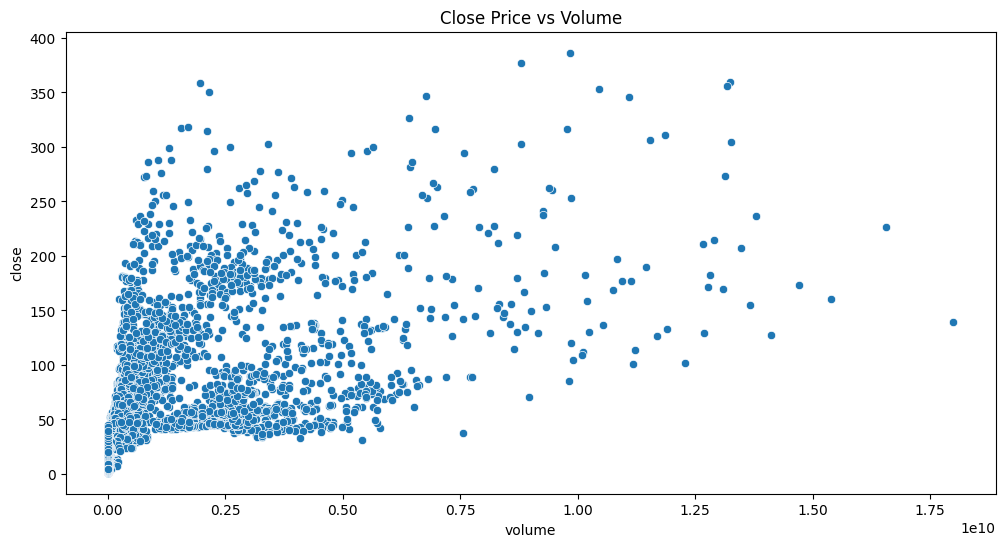

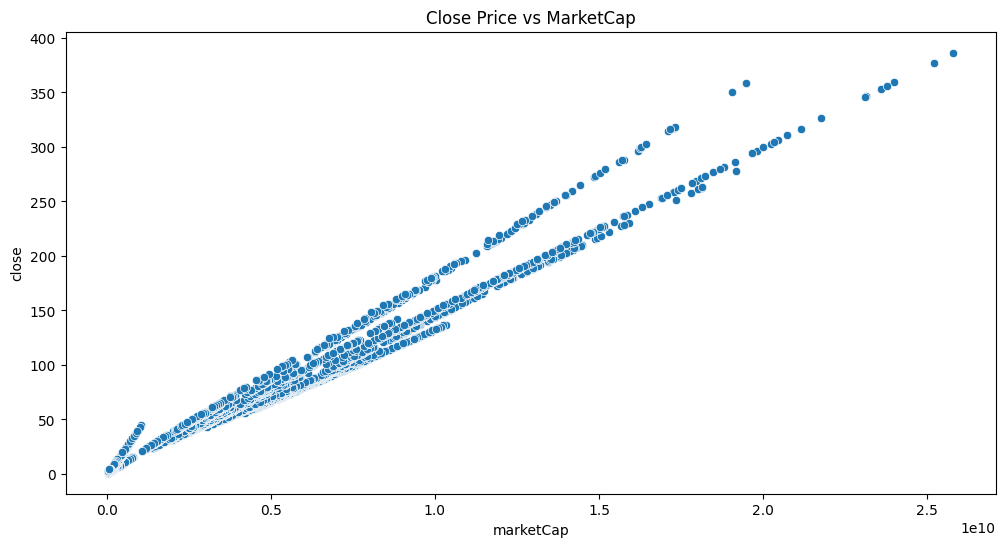

In [27]:
# Checking relationships:

plt.figure(figsize = (12,6))
sns.scatterplot(x='volume', y='close', data=df)
plt.title('Close Price vs Volume')
plt.show()

plt.figure(figsize = (12,6))
sns.scatterplot(x='marketCap', y='close', data=df)
plt.title('Close Price vs MarketCap')
plt.show()

# Data Preprocessing & Feature Engineering

In [28]:
# Removing Outliers & Handling Missing values:

In [29]:
df

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [30]:
# Function to detect Outlier using IQR:

def outliers_iqr (data, column):
    Q1 = data[column]. quantile(0.25)
    Q3 = data[column]. quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [31]:
print(outliers_iqr (df, 'marketCap'))
print(outliers_iqr (df, 'volume'))
print(outliers_iqr (df, 'close'))
print(outliers_iqr (df, 'open'))
print(outliers_iqr (df, 'high'))
print(outliers_iqr (df, 'low'))

           Date  timeOpen  timeHigh  open  high   low  close       volume  \
1285 2021-11-20  00:00:00  18:54:02 218.1 227.6 213.8  227.1 2134869389.0   
1288 2021-11-17  00:00:00  11:20:02 230.6 235.0 221.8  229.5 2863410681.0   
1289 2021-11-16  00:00:00  00:00:02 263.3 263.3 224.9  230.6 4031751969.0   
1290 2021-11-15  00:00:00  04:05:02 279.2 280.7 260.0  262.8 2797322397.0   
1291 2021-11-14  00:00:00  23:49:02 258.0 279.2 249.1  278.0 3230589098.0   
...         ...       ...       ...   ...   ...   ...    ...          ...   
2719 2017-12-17  00:00:00  07:09:02 301.8 332.6 301.8  318.7 1703580032.0   
2720 2017-12-16  00:00:00  12:29:02 299.3 309.9 290.1  299.0 1291379968.0   
2721 2017-12-15  00:00:00  16:54:02 281.0 316.4 251.2  299.8 2599940096.0   
2723 2017-12-13  00:00:00  13:19:02 315.4 341.8 287.5  302.6 3409789952.0   
2724 2017-12-12  00:00:00  14:29:02 212.5 341.7 209.7  316.2 6961679872.0   

         marketCap date_time_open      date_time_high  
1285 15672511289.0 

In [32]:
# Capping the Outliers:
# function to Cap the outliers:

df_capped = df.copy()
def cap_outliers_iqr (data, column):
    Q1 = data[column]. quantile(0.25)
    Q3 = data[column]. quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[column] = data[column].clip(lower = lower_bound, upper = upper_bound)
    return df_capped

In [33]:
cap_outliers_iqr (df_capped, 'open')

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [34]:
cap_outliers_iqr (df_capped, 'high')

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [35]:
cap_outliers_iqr (df_capped, 'low')

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [36]:
cap_outliers_iqr (df_capped, 'close')

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [37]:
cap_outliers_iqr (df_capped, 'volume')

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [38]:
cap_outliers_iqr (df_capped, 'marketCap')

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high
0,2025-05-28,00:00:00,12:41:00,96.0,97.4,93.6,95.3,409308570.0,7234342339.0,2025-05-28,2025-05-28 12:41:00
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00
...,...,...,...,...,...,...,...,...,...,...,...
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01


In [39]:
df.describe()

,Date,open,high,low,close,volume,marketCap,date_time_open,date_time_high
count,4413,4413.0,4413.0,4413.0,4413.0,4413.0,4413.0,4413,4413
mean,2019-05-13 23:59:59.999999744,63.7,66.0,61.2,63.7,1131858487.6,4165831102.1,2019-05-13 23:59:59.999999744,2019-05-14 10:40:08.905959936
min,2013-04-29 00:00:00,1.1,1.3,1.1,1.2,0.0,37892423.0,2013-04-29 00:00:00,2013-04-29 13:15:01
25%,2016-05-06 00:00:00,4.7,4.9,4.6,4.8,4297870.0,202769043.0,2016-05-06 00:00:00,2016-05-06 23:59:02
50%,2019-05-14 00:00:00,57.2,58.8,55.6,57.2,373329984.0,3684221719.0,2019-05-14 00:00:00,2019-05-14 08:02:00
75%,2022-05-21 00:00:00,89.1,91.7,86.3,89.2,1322213373.0,6336752067.0,2022-05-21 00:00:00,2022-05-21 16:29:00
max,2025-05-28 00:00:00,387.9,413.0,345.3,386.4,17994263494.0,25796522602.0,2025-05-28 00:00:00,2025-05-28 12:41:00
std,NaN,60.1,62.9,56.9,60.0,1916825709.9,3985613598.3,NaN,NaN


In [40]:
df_capped.describe()

,Date,open,high,low,close,volume,marketCap,date_time_open,date_time_high
count,4413,4413.0,4413.0,4413.0,4413.0,4413.0,4413.0,4413,4413
mean,2019-05-13 23:59:59.999999744,62.4,64.5,60.2,62.4,888136636.9,4123735396.6,2019-05-13 23:59:59.999999744,2019-05-14 10:40:08.905959936
min,2013-04-29 00:00:00,1.1,1.3,1.1,1.2,0.0,37892423.0,2013-04-29 00:00:00,2013-04-29 13:15:01
25%,2016-05-06 00:00:00,4.7,4.9,4.6,4.8,4297870.0,202769043.0,2016-05-06 00:00:00,2016-05-06 23:59:02
50%,2019-05-14 00:00:00,57.2,58.8,55.6,57.2,373329984.0,3684221719.0,2019-05-14 00:00:00,2019-05-14 08:02:00
75%,2022-05-21 00:00:00,89.1,91.7,86.3,89.2,1322213373.0,6336752067.0,2022-05-21 00:00:00,2022-05-21 16:29:00
max,2025-05-28 00:00:00,215.6,221.8,208.9,215.8,3299086627.5,15537726603.0,2025-05-28 00:00:00,2025-05-28 12:41:00
std,NaN,55.9,57.9,53.6,55.9,1135124252.6,3835702041.9,NaN,NaN


In [41]:
# Time-based feature engineering:

df2 = df_capped.copy()

df2 = df2.sort_values('Date')

In [42]:
df2['day_of_week'] = df2['Date'].dt.dayofweek # [0 = Monday,......., 6 = Sunday]
df2['day'] = df2['Date'].dt.day
df2['month'] = df2['Date'].dt.month
df2['year'] = df2['Date'].dt.year
df2['is_weekend'] = df2['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [43]:
# Creating lag feature:

df2['lag_1'] = df['close'].shift(1)
df2['lag_7'] = df['close'].shift(7)

In [44]:
# Creating Rolling features:

df2['rolling_mean_7'] = df['close'].rolling(window = 7).mean()
df2['rolling_std_7'] = df['close'].rolling(window = 7).std()

In [45]:
df2

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high,day_of_week,day,month,year,is_weekend,lag_1,lag_7,rolling_mean_7,rolling_std_7
4412,2013-04-29,00:00:00,13:15:01,4.4,4.6,4.2,4.4,0.0,75388964.0,2013-04-29,2013-04-29 13:15:01,0,29,4,2013,0,4.3,3.4,3.7,0.5
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01,1,30,4,2013,0,3.8,3.3,3.6,0.4
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03,2,1,5,2013,0,3.4,3.4,3.4,0.2
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02,3,2,5,2013,0,3.0,3.4,3.4,0.2
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01,4,3,5,2013,0,3.5,3.4,3.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-05-24,00:00:00,10:58:00,95.1,97.8,95.0,95.7,362386410.0,7261627049.0,2025-05-24,2025-05-24 10:58:00,5,24,5,2025,1,95.7,NaN,NaN,NaN
3,2025-05-25,00:00:00,00:36:00,95.7,96.0,93.3,95.7,373036618.0,7259848450.0,2025-05-25,2025-05-25 00:36:00,6,25,5,2025,1,95.0,NaN,NaN,NaN
2,2025-05-26,00:00:00,12:58:00,95.7,97.6,94.5,95.0,359429190.0,7210970875.0,2025-05-26,2025-05-26 12:58:00,0,26,5,2025,0,96.0,NaN,NaN,NaN
1,2025-05-27,00:00:00,20:37:00,95.0,97.0,93.2,96.0,461941241.0,7283744240.0,2025-05-27,2025-05-27 20:37:00,1,27,5,2025,0,95.3,NaN,NaN,NaN


In [46]:
df2.isnull().sum()

,0
Date,0
timeOpen,0
timeHigh,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
date_time_open,0


In [47]:
df3 = df2.dropna()
df3

,Date,timeOpen,timeHigh,open,high,low,close,volume,marketCap,date_time_open,date_time_high,day_of_week,day,month,year,is_weekend,lag_1,lag_7,rolling_mean_7,rolling_std_7
4412,2013-04-29,00:00:00,13:15:01,4.4,4.6,4.2,4.4,0.0,75388964.0,2013-04-29,2013-04-29 13:15:01,0,29,4,2013,0,4.3,3.4,3.7,0.5
4411,2013-04-30,00:00:00,09:00:01,4.4,4.6,4.2,4.3,0.0,74020918.0,2013-04-30,2013-04-30 09:00:01,1,30,4,2013,0,3.8,3.3,3.6,0.4
4410,2013-05-01,00:00:00,00:45:03,4.3,4.4,3.5,3.8,0.0,65604596.0,2013-05-01,2013-05-01 00:45:03,2,1,5,2013,0,3.4,3.4,3.4,0.2
4409,2013-05-02,00:00:00,08:15:02,3.8,4.0,3.0,3.4,0.0,58287979.0,2013-05-02,2013-05-02 08:15:02,3,2,5,2013,0,3.0,3.4,3.4,0.2
4408,2013-05-03,00:00:00,00:05:01,3.4,3.5,2.4,3.0,0.0,52694847.0,2013-05-03,2013-05-03 00:05:01,4,3,5,2013,0,3.5,3.4,3.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2025-05-17,00:00:00,06:56:00,99.5,101.1,95.8,96.3,503355643.0,7305049039.0,2025-05-17,2025-05-17 06:56:00,5,17,5,2025,1,101.2,95.7,97.6,2.5
10,2025-05-18,00:00:00,16:14:00,96.3,102.2,96.1,101.2,529675531.0,7673364350.0,2025-05-18,2025-05-18 16:14:00,6,18,5,2025,1,98.3,95.7,97.5,2.6
9,2025-05-19,00:00:00,00:00:00,101.1,101.1,94.5,98.3,559403328.0,7461590470.0,2025-05-19,2025-05-19 00:00:00,0,19,5,2025,0,94.4,95.0,96.7,2.1
8,2025-05-20,00:00:00,02:22:00,98.3,99.5,92.5,94.4,704464955.0,7162607688.0,2025-05-20,2025-05-20 02:22:00,1,20,5,2025,0,97.3,96.0,96.2,2.0


                open  high  close  low  volume  lag_1  lag_7  rolling_mean_7  \
open             1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
high             1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
close            1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
low              1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
volume           0.6   0.6    0.6  0.6     1.0    0.6    0.6             0.6   
lag_1            1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
lag_7            1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
rolling_mean_7   1.0   1.0    1.0  1.0     0.6    1.0    1.0             1.0   
rolling_std_7    0.7   0.7    0.7  0.7     0.4    0.7    0.7             0.7   

                rolling_std_7  
open                      0.7  
high                      0.7  
close                     0.7  
low                       0.7  
volume                    0.4  
lag_1  

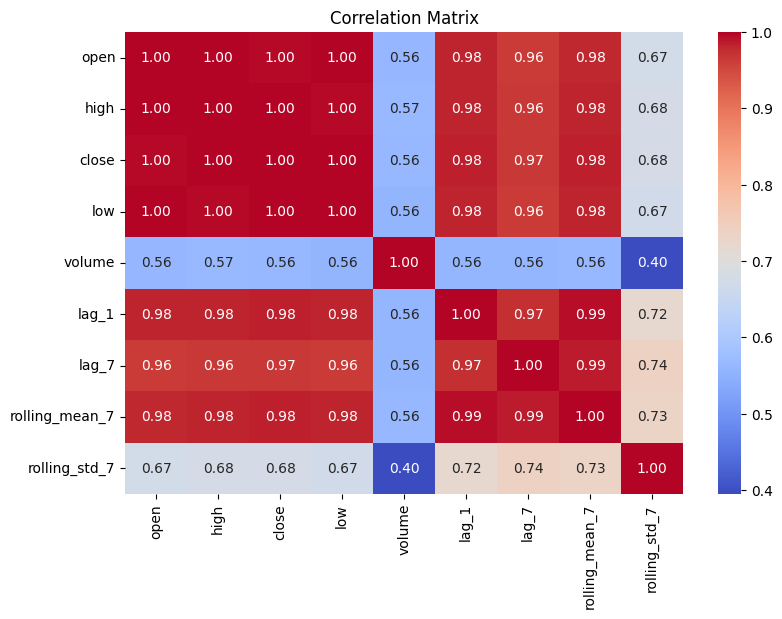

In [48]:
# Analyzing correlation between variables:

correlation_matrix = df3[['open', 'high', 'close', 'low', 'volume', 'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7']].corr().round(4)
print(correlation_matrix)


plt.figure(figsize = (9, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [49]:
# Normalizing or standardizing features:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
Scaled_features = ['open', 'high', 'close', 'low', 'volume', 'marketCap', 'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7']

In [51]:
df_minmax = df3.copy()
df_zscore = df3.copy()

In [52]:
# Min-Max Scaling:

minmax_scaler = MinMaxScaler()
df_minmax[Scaled_features] = minmax_scaler.fit_transform(df_minmax[Scaled_features])

In [53]:
# Z-Score Standardization:

zscore_scaler = StandardScaler()
df_zscore[Scaled_features] = zscore_scaler.fit_transform(df_zscore[Scaled_features])

In [54]:
df_minmax[Scaled_features].describe()

,open,high,close,low,volume,marketCap,lag_1,lag_7,rolling_mean_7,rolling_std_7
count,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0
mean,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.0
std,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.3,0.3,0.3,0.3,0.1,0.2,0.1,0.1,0.2,0.0
75%,0.4,0.4,0.4,0.4,0.4,0.4,0.2,0.2,0.2,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [55]:
df_zscore[Scaled_features].describe()

,open,high,close,low,volume,marketCap,lag_1,lag_7,rolling_mean_7,rolling_std_7
count,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0,4406.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.1,-1.1,-1.1,-1.1,-0.8,-1.1,-1.0,-1.0,-1.0,-0.6
25%,-1.0,-1.0,-1.0,-1.0,-0.8,-1.0,-1.0,-1.0,-1.0,-0.6
50%,-0.1,-0.1,-0.1,-0.1,-0.5,-0.1,-0.1,-0.1,-0.1,-0.3
75%,0.5,0.5,0.5,0.5,0.4,0.6,0.4,0.4,0.4,0.1
max,2.7,2.7,2.7,2.8,2.1,3.0,5.4,5.4,5.0,14.9


# Regression Model Development and Evaluation:

In [56]:
# Splitting the data into Training, Validation & Testing sets:

from sklearn.model_selection import train_test_split

In [57]:
df3.columns

Index(['Date', 'timeOpen', 'timeHigh', 'open', 'high', 'low', 'close',
       'volume', 'marketCap', 'date_time_open', 'date_time_high',
       'day_of_week', 'day', 'month', 'year', 'is_weekend', 'lag_1', 'lag_7',
       'rolling_mean_7', 'rolling_std_7'],
      dtype='object')

In [58]:
# Defining features 'X' and target 'Y'
X = df3[['open', 'high', 'low', 'volume', 'marketCap', 'day_of_week', 'day', 'month', 'year', 'is_weekend', 'lag_1', 'lag_7', 'rolling_mean_7', 'rolling_std_7']]
Y = df3['close']

In [59]:
# training data: 70%; validation data: 15%; testing data: 15%:


# Calculating Size:
training_size = int(0.70 * len(X))
validation_size = int(0.15 * len(X))

# Split of X & Y:
X_train = X.iloc[:training_size]
X_vld = X.iloc[training_size : training_size + validation_size]
X_test = X.iloc[training_size + validation_size:]

Y_train = Y.iloc[:training_size]
Y_vld = Y.iloc[training_size : training_size + validation_size]
Y_test = Y.iloc[training_size + validation_size:]

In [60]:
print(f'Training Size: {X_train.shape}, {Y_train.shape}')
print(f'Validation Size: {X_vld.shape}, {Y_vld.shape}')
print(f'Testing Size: {X_test.shape}, {Y_test.shape}')

Training Size: (3084, 14), (3084,)
Validation Size: (660, 14), (660,)
Testing Size: (662, 14), (662,)


In [61]:
# Scaling the features:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_vld_scaled = scaler.fit_transform(X_vld)
X_test_scaled = scaler.fit_transform(X_test)

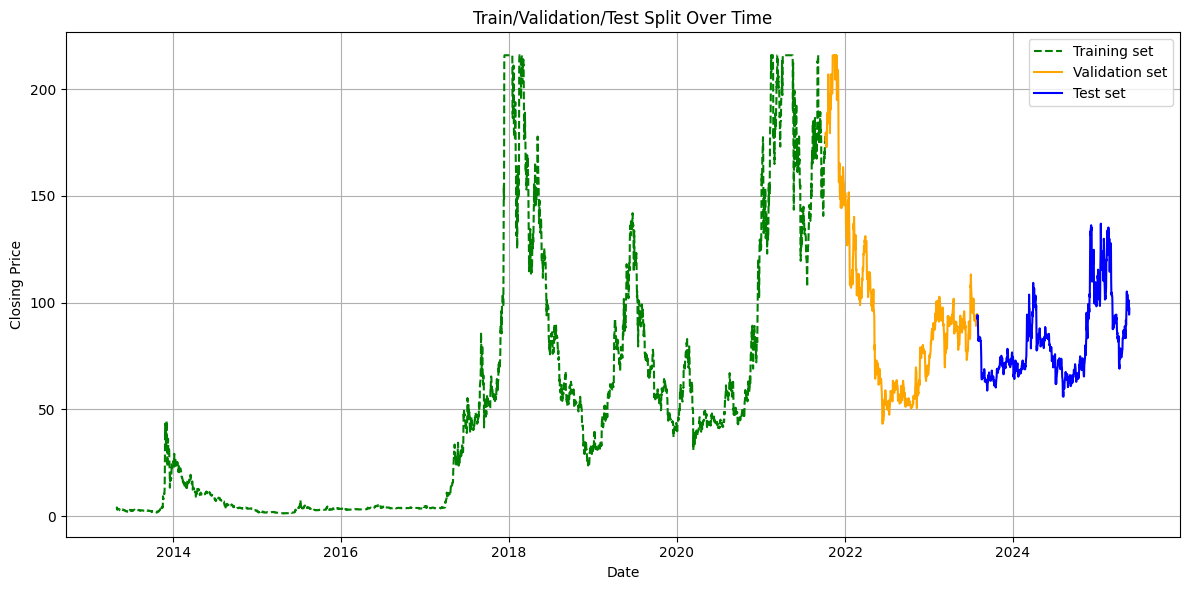

In [62]:
#Visual represtenation of Data splitting:

dates = df3['Date']

dates_train = dates.loc[X_train.index]
dates_vld = dates.loc[X_vld.index]
dates_test = dates.loc[X_test.index]

plt.figure(figsize=(12, 6))

plt.plot(dates_train, Y_train, 'g--', label='Training set')
plt.plot(dates_vld, Y_vld, 'orange', label='Validation set')
plt.plot(dates_test, Y_test, 'b-', label='Test set')

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Train/Validation/Test Split Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.30, shuffle=False)
# X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.50, shuffle=False)

# print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# print(f"Train: {Y_train.shape}, Val: {Y_val.shape}, Test: {Y_test.shape}")

In [64]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_vld, Y_train, Y_vld)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2361
[LightGBM] [Info] Number of data points in the train set: 3084, number of used features: 14
[LightGBM] [Info] Start training from score 50.973328


In [65]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               1.00       1.00  1.82        0.13
RANSACRegressor                              1.00       1.00  1.87        0.03
LinearRegression                             1.00       1.00  1.87        0.03
TransformedTargetRegressor                   1.00       1.00  1.87        0.02
LassoLarsIC                                  1.00       1.00  1.87        0.13
LassoLarsCV                                  1.00       1.00  1.87        0.06
BayesianRidge                                1.00       1.00  1.87        0.03
RidgeCV                                      1.00       1.00  1.88        0.03
Ridge                                        1.00       1.00  1.99        0.02
LinearSVR                                    1.00       1.00  2.10        0.14
PassiveAggressiveRegressor                   1.00   

In [66]:
# Implementing the best 2 models:

from sklearn.linear_model import HuberRegressor, LassoLarsIC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model 1: Huber Regressor

huber = HuberRegressor()
huber.fit(X_train, Y_train)
huber_predict_test = huber.predict(X_test)
huber_predict_vld = huber.predict(X_vld)

# Model 2: LassoLarsIC

lasso = LassoLarsIC()
lasso.fit(X_train, Y_train)
lasso_predict_test = lasso.predict(X_test)
lasso_predict_vld = lasso.predict(X_vld)

# Evaluation Function:
def evaluate_model (y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('R-Square:', r2_score(y_true, y_pred))

# Evaluating both models:

evaluate_model(Y_test, huber_predict_test, "Huber Regressor (Test set)")
evaluate_model(Y_vld, huber_predict_vld, "Huber Regressor (Validation set)")
evaluate_model(Y_test, lasso_predict_test, "LassoLasrIC Regressor (Test set)")
evaluate_model(Y_vld, lasso_predict_vld, "LassoLasrIC Regressor (Validation set)")


Huber Regressor (Test set) Evaluation:
MSE: 327.673239549825
MAE: 17.581062830110483
R-Square: -0.017973524451255996

Huber Regressor (Validation set) Evaluation:
MSE: 236.61215515569722
MAE: 14.491503811553793
R-Square: 0.862448758644741

LassoLasrIC Regressor (Test set) Evaluation:
MSE: 3.3023054507213754
MAE: 1.2241847148628804
R-Square: 0.989740817641673

LassoLasrIC Regressor (Validation set) Evaluation:
MSE: 3.5103653535306125
MAE: 1.2628143355434138
R-Square: 0.9979592970966733


In [67]:
# Implementation on Scaled features:

# Model 1: Huber Regressor

huber.fit(X_train_scaled, Y_train)
huber_predict_test_scaled = huber.predict(X_test_scaled)
huber_predict_vld_scaled = huber.predict(X_vld_scaled)

# Model 2: LassoLarsIC

lasso.fit(X_train_scaled, Y_train)
lasso_predict_test_scaled = lasso.predict(X_test_scaled)
lasso_predict_vld_scaled = lasso.predict(X_vld_scaled)

# Evaluating both models:

evaluate_model(Y_test, huber_predict_test_scaled, "Huber Regressor (Test set) - Scaled")
evaluate_model(Y_vld, huber_predict_vld_scaled, "Huber Regressor (Validation set) - Scaled")
evaluate_model(Y_test, lasso_predict_test_scaled, "LassoLasrIC Regressor (Test set) - Scaled")
evaluate_model(Y_vld, lasso_predict_vld_scaled, "LassoLasrIC Regressor (Validation set) - Scaled")


Huber Regressor (Test set) - Scaled Evaluation:
MSE: 2683.884407746287
MAE: 46.49507579528592
R-Square: -7.337950555641337

Huber Regressor (Validation set) - Scaled Evaluation:
MSE: 2419.61315331201
MAE: 46.10791283515134
R-Square: -0.40660902487691075

LassoLasrIC Regressor (Test set) - Scaled Evaluation:
MSE: 2680.723644542849
MAE: 46.52747035119611
R-Square: -7.32813109872572

LassoLasrIC Regressor (Validation set) - Scaled Evaluation:
MSE: 2411.4322281326395
MAE: 46.05070805740527
R-Square: -0.4018531558763665


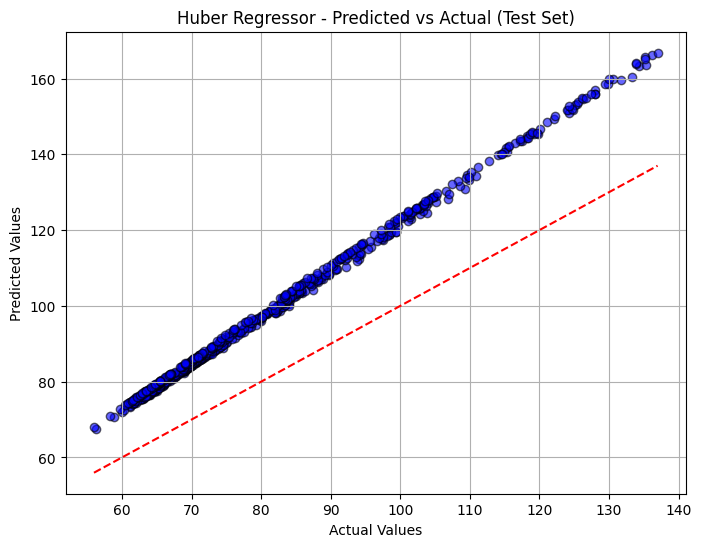

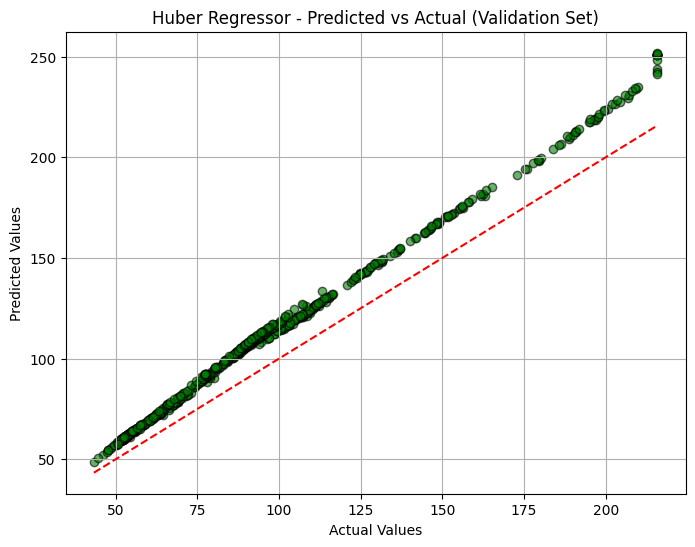

In [68]:
# Plot for HuberRegressor (Test set)
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, huber_predict_test, color='blue', alpha=0.6, edgecolor='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor - Predicted vs Actual (Test Set)')
plt.grid(True)
plt.show()

# plot for HuberRegressor (Validation set)
plt.figure(figsize=(8, 6))
plt.scatter(Y_vld, huber_predict_vld, color='green', alpha=0.6, edgecolor='k')
plt.plot([Y_vld.min(), Y_vld.max()], [Y_vld.min(), Y_vld.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor - Predicted vs Actual (Validation Set)')
plt.grid(True)
plt.show()

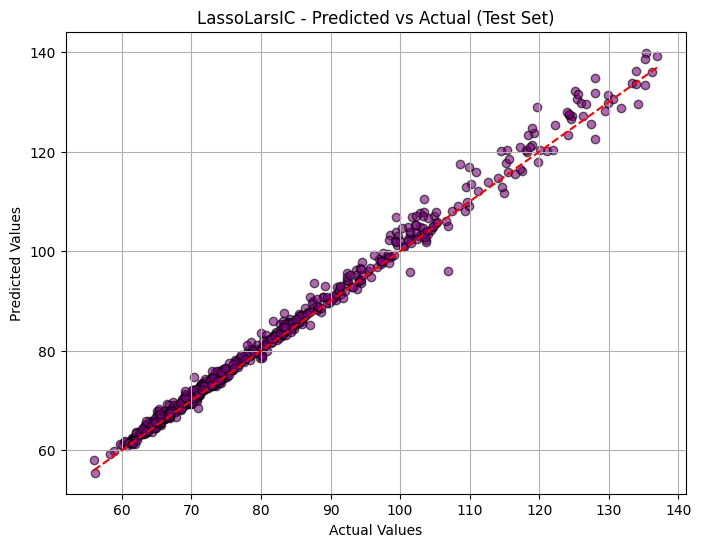

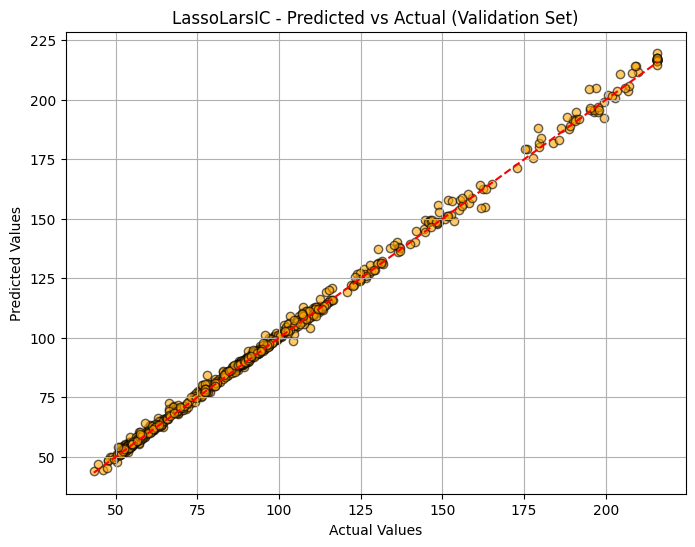

In [69]:
# Plot for LassoLarsIC (Test set)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lasso_predict_test, color='purple', alpha=0.6, edgecolor='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LassoLarsIC - Predicted vs Actual (Test Set)')
plt.grid(True)
plt.show()

# Plot for LassoLarsIC (Validation set)

plt.figure(figsize=(8, 6))
plt.scatter(Y_vld, lasso_predict_vld, color='orange', alpha=0.6, edgecolor='k')
plt.plot([Y_vld.min(), Y_vld.max()], [Y_vld.min(), Y_vld.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LassoLarsIC - Predicted vs Actual (Validation Set)')
plt.grid(True)
plt.show()

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
gbr_predict_test = gbr.predict(X_test)
gbr_predict_vld = gbr.predict(X_vld)

evaluate_model(Y_test, gbr_predict_test, "Gradient Boosting Regressor (Test set)")
evaluate_model(Y_vld, gbr_predict_vld, "Gradient Boosting Regressor (Validation set)")


Gradient Boosting Regressor (Test set) Evaluation:
MSE: 6.459873063016137
MAE: 1.8272354934486161
R-Square: 0.9799312883819847

Gradient Boosting Regressor (Validation set) Evaluation:
MSE: 6.031514605764502
MAE: 1.7767976246589021
R-Square: 0.9964936614489254


In [71]:
#Implementation on scaled features:

gbr.fit(X_train_scaled, Y_train)
gbr_predict_test_scaled = gbr.predict(X_test_scaled)
gbr_predict_vld_scaled = gbr.predict(X_vld_scaled)

# Evaluating model:

evaluate_model(Y_test, gbr_predict_test_scaled, "Gradient Boosting Regressor (Test set) - Scaled")
evaluate_model(Y_vld, gbr_predict_vld_scaled, "Gradient Boosting Regressor (Validation set) - Scaled")


Gradient Boosting Regressor (Test set) - Scaled Evaluation:
MSE: 2403.3161775359904
MAE: 44.539500948476814
R-Square: -6.4663168801278434

Gradient Boosting Regressor (Validation set) - Scaled Evaluation:
MSE: 2140.5538619627832
MAE: 43.32969890446524
R-Square: -0.24438172124770063


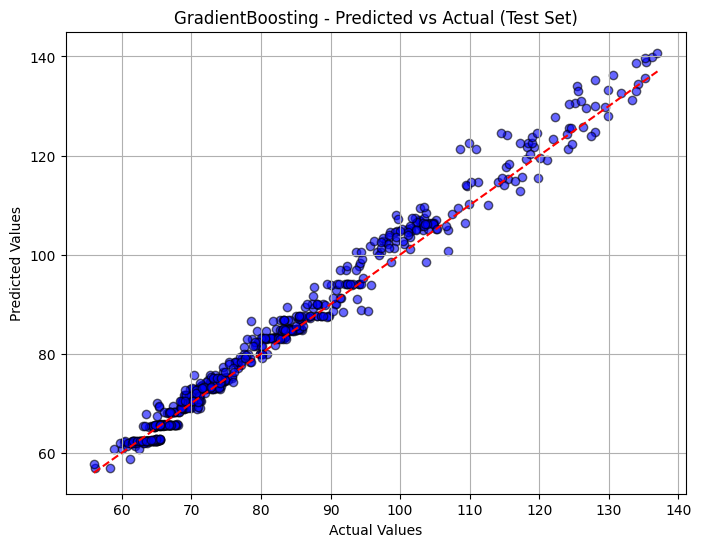

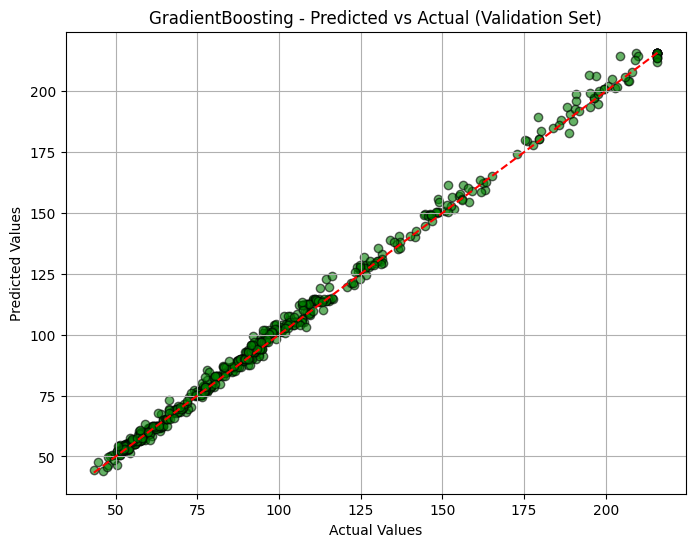

In [72]:
# Plot for Gradient Boost Regressor (Test set)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, gbr_predict_test, color='blue', alpha=0.6, edgecolor='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('GradientBoosting - Predicted vs Actual (Test Set)')
plt.grid(True)
plt.show()

# Plot for Gradient Boost Regressor (Validation set)

plt.figure(figsize=(8, 6))
plt.scatter(Y_vld, gbr_predict_vld, color='green', alpha=0.6, edgecolor='k')
plt.plot([Y_vld.min(), Y_vld.max()], [Y_vld.min(), Y_vld.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('GradientBoosting - Predicted vs Actual (Validation Set)')
plt.grid(True)
plt.show()


open             -0.46
high              0.82
low               0.56
volume           -0.00
marketCap         0.00
day_of_week       0.06
day              -0.00
month            -0.01
year              0.01
is_weekend       -0.23
lag_1             0.03
lag_7             0.01
rolling_mean_7   -0.02
rolling_std_7    -0.01
dtype: float64


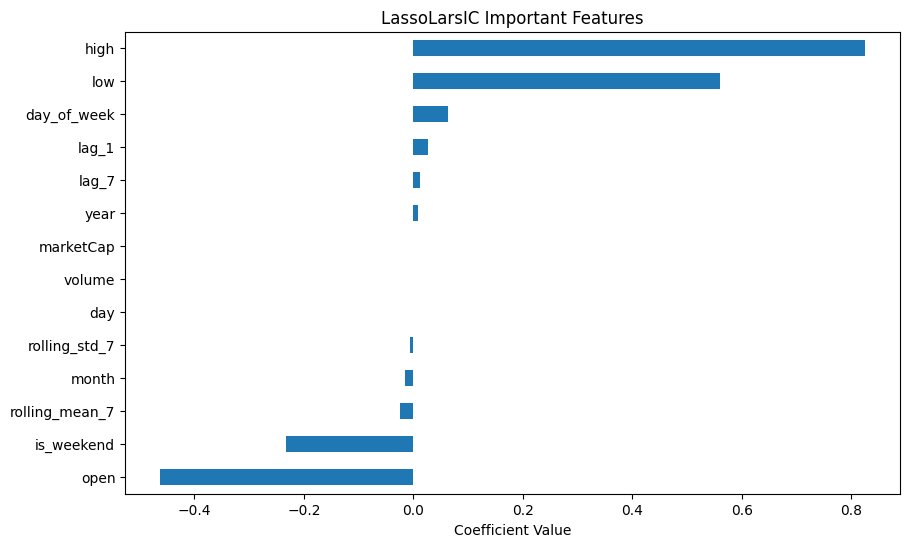

In [73]:
# Most Influential features:

# Using LassoLarsIC:

lasso_ic = LassoLarsIC(criterion = 'aic')
lasso_ic.fit(X_train, Y_train)

coef = lasso_ic.coef_
imp_features = pd.Series(coef, index = X_train.columns)
imp_features = imp_features[imp_features != 0]
print(imp_features)

#visual representation of the important features:
imp_features.sort_values().plot(kind = 'barh', figsize=(10,6), title = 'LassoLarsIC Important Features')
plt.xlabel('Coefficient Value')
plt.show()

open             0.00
high             0.46
low              0.35
volume           0.00
marketCap        0.04
day_of_week      0.00
day              0.00
month            0.00
year             0.00
is_weekend       0.00
lag_1            0.14
lag_7            0.00
rolling_mean_7   0.01
rolling_std_7    0.00
dtype: float64


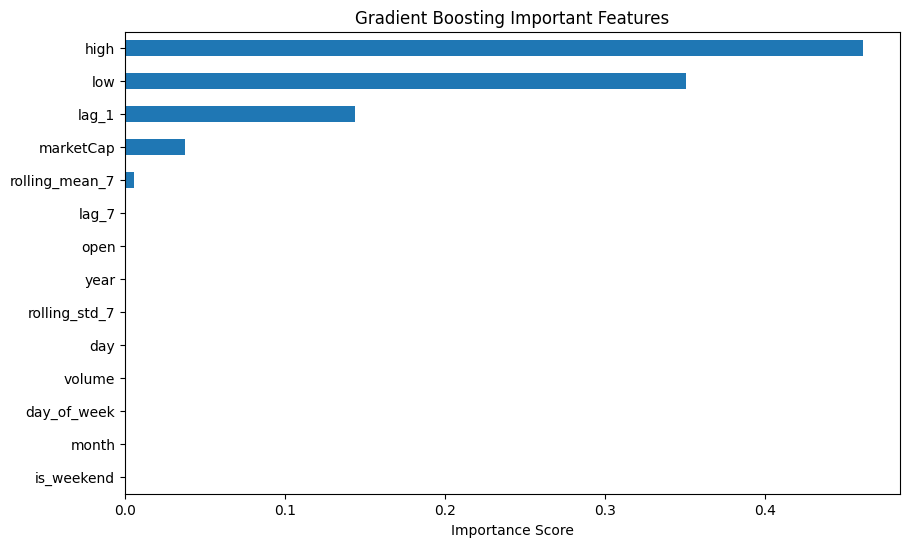

In [74]:
# Using GradientBosterRegressor:
imp_gbr = pd.Series(gbr.feature_importances_, index=X_train.columns)
print(imp_gbr)

#visual representation of the important features:
imp_gbr.sort_values().plot(kind = 'barh', figsize=(10,6), title = 'Gradient Boosting Important Features')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
# Hyperparameter Tuning using Validation set:

# Using Gradient Boosting Regressor:

best_model_gbr = None
best_score_gbr = float('inf')
best_params_gbr = {}

#defining grid
n_estimators = [50, 100, 200]
learning_rates = [0.05, 0.1]
max_depths = [3, 5, 7]

#manual grid search using validation set
for n in n_estimators:
    for lr in learning_rates:
        for d in max_depths:
            gbr_model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, max_depth=d, random_state=42)
            gbr_model.fit(X_train, Y_train)
            Y_pred_vld = gbr_model.predict(X_vld) #predict on validation set
            MSE_gbr_vld = mean_squared_error(Y_vld, Y_pred_vld)

            if MSE_gbr_vld < best_score_gbr:
                best_score_gbr = MSE_gbr_vld
                best_model_gbr = gbr_model
                best_params_gbr = {'n_estimators': n, 'learning_rate': lr, 'max_depth': d}

print("Best Hyperparameters:", best_params_gbr)

# predicting on test set:

Y_pred_gbr = best_model_gbr.predict(X_test)

# Evaluate:
evaluate_model(Y_test, Y_pred_gbr, "GBR Evaluation Tuning result on Test Set")

In [ ]:
# Using LassoLarsIC:

#Dictionary to store results
results = {}

#try both 'aic' & 'bic'
for criterion in ['aic', 'bic']:
    model_LLIC = LassoLarsIC(criterion = criterion)
    model_LLIC.fit(X_train, Y_train)
    Y_pred_vld_LLIC = model_LLIC.predict(X_vld) #predict on validation set

    # save the result
    results[criterion] = {
        'model':model_LLIC,
        'alpha':model_LLIC.alpha_,
        'MSE':mean_squared_error(Y_vld, Y_pred_vld_LLIC),
        'MAE':mean_absolute_error(Y_vld, Y_pred_vld_LLIC),
        'R-Square':r2_score(Y_vld, Y_pred_vld_LLIC)
    }

for crit, res in results.items():
    print(f"=== LassoLarsIC with {crit.upper()} ===")
    print(f"Selected Alpha: {res['alpha']:.4f}")
    print(f"MSE: {res['MSE']:.4f}")
    print(f"MAE: {res['MAE']:.4f}")
    print(f"R^2: {res['R-Square']:.4f}")
    print()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5]
# }

# grid = GridSearchCV(GradientBoostingRegressor(), params, cv=3)
# grid.fit(X_train, Y_train)

# best_model = grid.best_estimator_
# best_model

# Y_pred = best_model.predict(X_test)

# evaluate_model(Y_test, Y_pred, "GBR Evaluation Test Set")